#### Import der Query Store Daten für anschließendes Feature Engineering und Outlierdetection

In [45]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO


In [46]:
import pyarrow.parquet as pq;

In [47]:
import pyodbc as db

import pandas as pd

conn = db.connect("DRIVER={ODBC Driver 13 for SQL Server}; SERVER=.; PORT=1433; DATABASE=AdventureWorksDW2012; UID=techday; PWD=techday;")

cursor = conn.cursor()

cursor.execute('''
Select s.*,p.avg_compile_duration,p.compatibility_level,p.count_compiles,
p.engine_version,p.force_failure_count,p.initial_compile_start_time as 'initial_plan_compile_start_time',p.is_forced_plan,p.is_natively_compiled,p.is_online_index_plan,
p.is_parallel_plan,p.is_trivial_plan,p.last_compile_duration,p.last_compile_start_time,p.last_execution_time as plan_last_execution_time,
p.last_force_failure_reason,p.last_force_failure_reason_desc,p.plan_group_id,CAST(p.query_plan as nvarchar(max)) as 'query_plan',p.query_plan_hash, i.start_time,i.end_time,
q.avg_bind_cpu_time,q.avg_bind_duration,q.avg_compile_duration as 'avg_query_compiles',q.avg_compile_memory_kb,q.avg_optimize_cpu_time,q.avg_optimize_duration,
q.batch_sql_handle,q.context_settings_id,q.count_compiles as 'count_query_compiles',q.initial_compile_start_time,q.is_clouddb_internal_query,
q.is_internal_query,q.last_bind_cpu_time,q.last_bind_duration,q.last_compile_batch_offset_end,q.last_compile_batch_offset_start,
q.last_compile_batch_sql_handle,q.last_compile_duration as 'last_query_compile_duration',q.last_compile_memory_kb,q.last_compile_start_time as 'last_query_compile_start_time',
q.last_execution_time as 'last_query_execution_time',q.last_optimize_cpu_time,
q.last_optimize_duration,q.max_compile_memory_kb,q.object_id,q.query_parameterization_type, q.query_parameterization_type_desc,CAST(qt.query_sql_text as nvarchar(max)) as 'query_sql_text',
qt.has_restricted_text,qt.is_part_of_encrypted_module, 'QueryStoreEndofLineMarker' as EndOfLineMarker
from 
sys.query_store_runtime_stats s join sys.query_store_plan p on s.plan_id = p.plan_id join sys.query_store_query q on q.query_id = p.query_id
join sys.query_store_query_text qt on q.query_text_id = qt.query_text_id
join  sys.query_store_runtime_stats_interval i on s.runtime_stats_interval_id = i.runtime_stats_interval_id''')

df=pd.DataFrame(cursor.fetchall())
df[1]

ProgrammingError: ('ODBC SQL type -155 is not yet supported.  column-index=5  type=-155', 'HY106')

In [48]:
lines = open('QueryStoreOutput.csv',encoding="utf16").read().splitlines()
lines[2]

'db.name as HasMemoryOptimizedObjects from master.sys.master_files mf join master.sys.databases db on mf.database_id = db.database_id where mf.[type] = 2<Text><qs_new_column_delimiter><Text>False<Text><qs_new_column_delimiter><Text>False<Text><qs_new_column_delimiter><Text>QueryStoreEndofLineMarker<Text>'

In [49]:
reallines = []
currentline = ""
for l in lines[1:]:
    currentline += l
    if (l.count('QueryStoreEndofLineMarker')>0):
        reallines.append(currentline.replace('<Text>',''))
        #setze aktuelle zeile zurück 
        currentline = ""


In [50]:
reallines[2]

'130<qs_new_column_delimiter>1<qs_new_column_delimiter>3<qs_new_column_delimiter>0<qs_new_column_delimiter>Regular<qs_new_column_delimiter>2018-02-20 12:01:00.6000000 +00:00<qs_new_column_delimiter>2018-02-20 12:01:00.6000000 +00:00<qs_new_column_delimiter>1<qs_new_column_delimiter>1288<qs_new_column_delimiter>1288<qs_new_column_delimiter>1288<qs_new_column_delimiter>1288<qs_new_column_delimiter>0<qs_new_column_delimiter>1287<qs_new_column_delimiter>1287<qs_new_column_delimiter>1287<qs_new_column_delimiter>1287<qs_new_column_delimiter>0<qs_new_column_delimiter>34<qs_new_column_delimiter>34<qs_new_column_delimiter>34<qs_new_column_delimiter>34<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_column_delimiter>0<qs_new_colu

In [51]:
data = []  
for l in reallines[1:]:
    x = l.split('<qs_new_column_delimiter>');
    #print(len(x))
    if (len(x)!= 105):
        print("fehler!")
    else:
        data.append(x)

    
    
    
columnnames = lines[0].replace('<Text>','').split('<qs_new_column_delimiter>')
len(data[1])


fehler!
fehler!
fehler!
fehler!
fehler!
fehler!
fehler!
fehler!
fehler!
fehler!
fehler!
fehler!


105

In [52]:
len(columnnames)

105

In [53]:
df = pd.DataFrame(data,columns = columnnames)
df

,runtime_stats_id,plan_id,runtime_stats_interval_id,execution_type,execution_type_desc,first_execution_time,last_execution_time,count_executions,avg_duration,last_duration,...,last_optimize_cpu_time,last_optimize_duration,max_compile_memory_kb,object_id,query_parameterization_type,query_parameterization_type_desc,query_sql_text,has_restricted_text,is_part_of_encrypted_module,EndOfLineMarker
0,70,1,2,0,Regular,2018-02-20 10:08:43.4900000 +00:00,2018-02-20 10:08:43.4900000 +00:00,1,955,955,...,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
1,130,1,3,0,Regular,2018-02-20 12:01:00.6000000 +00:00,2018-02-20 12:01:00.6000000 +00:00,1,1288,1288,...,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
2,131,1,4,0,Regular,2018-02-20 14:56:52.8600000 +00:00,2018-02-20 14:56:52.8600000 +00:00,1,1440,1440,...,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
3,136,1,7,0,Regular,2018-02-22 09:58:28.1200000 +00:00,2018-02-22 09:58:28.1200000 +00:00,1,1593,1593,...,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
4,137,1,8,0,Regular,2018-02-27 13:28:41.5030000 +00:00,2018-02-27 13:28:41.5030000 +00:00,1,1289,1289,...,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
5,138,1,9,0,Regular,2018-03-02 13:17:44.9800000 +00:00,2018-03-02 13:17:44.9800000 +00:00,1,2229,2229,...,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
6,139,1,10,0,Regular,2018-03-05 08:05:00.5100000 +00:00,2018-03-05 08:05:00.5100000 +00:00,1,920,920,...,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
7,140,1,11,0,Regular,2018-03-08 10:43:18.7200000 +00:00,2018-03-08 10:43:18.7200000 +00:00,1,1230,1230,...,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
8,145,1,14,0,Regular,2018-03-13 11:31:07.8800000 +00:00,2018-03-13 11:54:01.9270000 +00:00,7,866.85714285714289,764,...,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker
9,150,1,15,0,Regular,2018-03-14 09:51:09.3370000 +00:00,2018-03-14 09:51:09.3370000 +00:00,1,1192,1192,...,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False,False,QueryStoreEndofLineMarker


In [54]:
df.to_parquet('querystoredata.gzip', compression='gzip')

## Zum Laden folgenden Befehl in neuem Notebook eingeben:
Man kann das Dataframe auch slicen und exportieren z.b für PowerBI

In [55]:
dfnew = pd.read_parquet('querystoredata.gzip')

## Das Dataframe genauer untersuchen: (Alternativ könnte man auch die Pandas Ausgabe erweitern!

In [56]:
df[df.columns[1:21]][1:5]

,plan_id,runtime_stats_interval_id,execution_type,execution_type_desc,first_execution_time,last_execution_time,count_executions,avg_duration,last_duration,min_duration,max_duration,stdev_duration,avg_cpu_time,last_cpu_time,min_cpu_time,max_cpu_time,stdev_cpu_time,avg_logical_io_reads,last_logical_io_reads,min_logical_io_reads
1,1,3,0,Regular,2018-02-20 12:01:00.6000000 +00:00,2018-02-20 12:01:00.6000000 +00:00,1,1288,1288,1288,1288,0,1287,1287,1287,1287,0,34,34,34
2,1,4,0,Regular,2018-02-20 14:56:52.8600000 +00:00,2018-02-20 14:56:52.8600000 +00:00,1,1440,1440,1440,1440,0,1440,1440,1440,1440,0,34,34,34
3,1,7,0,Regular,2018-02-22 09:58:28.1200000 +00:00,2018-02-22 09:58:28.1200000 +00:00,1,1593,1593,1593,1593,0,1593,1593,1593,1593,0,34,34,34
4,1,8,0,Regular,2018-02-27 13:28:41.5030000 +00:00,2018-02-27 13:28:41.5030000 +00:00,1,1289,1289,1289,1289,0,1288,1288,1288,1288,0,34,34,34


In [57]:
df[df.columns[21:42]][1:5]

,max_logical_io_reads,stdev_logical_io_reads,avg_logical_io_writes,last_logical_io_writes,min_logical_io_writes,max_logical_io_writes,stdev_logical_io_writes,avg_physical_io_reads,last_physical_io_reads,min_physical_io_reads,...,stdev_physical_io_reads,avg_clr_time,last_clr_time,min_clr_time,max_clr_time,stdev_clr_time,avg_dop,last_dop,min_dop,max_dop
1,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
3,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [58]:
df[df.columns[42:62]][1:5]

,stdev_dop,avg_query_max_used_memory,last_query_max_used_memory,min_query_max_used_memory,max_query_max_used_memory,stdev_query_max_used_memory,avg_rowcount,last_rowcount,min_rowcount,max_rowcount,stdev_rowcount,avg_compile_duration,compatibility_level,count_compiles,engine_version,force_failure_count,initial_plan_compile_start_time,is_forced_plan,is_natively_compiled,is_online_index_plan
1,0,270,270,270,270,0,3,3,3,3,0,27081.846153846152,130,52,13.0.5026.0,0,2018-02-20 09:54:33.5300000 +00:00,False,False,False
2,0,270,270,270,270,0,3,3,3,3,0,27081.846153846152,130,52,13.0.5026.0,0,2018-02-20 09:54:33.5300000 +00:00,False,False,False
3,0,270,270,270,270,0,3,3,3,3,0,27081.846153846152,130,52,13.0.5026.0,0,2018-02-20 09:54:33.5300000 +00:00,False,False,False
4,0,270,270,270,270,0,3,3,3,3,0,27081.846153846152,130,52,13.0.5026.0,0,2018-02-20 09:54:33.5300000 +00:00,False,False,False


In [59]:
df[df.columns[62:82]][1:5]

,is_parallel_plan,is_trivial_plan,last_compile_duration,last_compile_start_time,plan_last_execution_time,last_force_failure_reason,last_force_failure_reason_desc,plan_group_id,query_plan,query_plan_hash,start_time,end_time,avg_bind_cpu_time,avg_bind_duration,avg_query_compiles,avg_compile_memory_kb,avg_optimize_cpu_time,avg_optimize_duration,batch_sql_handle,context_settings_id
1,False,False,36714,2018-06-15 18:09:29.1930000 +00:00,2018-06-15 18:09:29.2330000 +00:00,0,NONE,0,"<ShowPlanXML xmlns=""http://schemas.microsoft.c...",67946654650BA6C1,2018-02-20 12:00:00.0000000 +00:00,2018-02-20 13:00:00.0000000 +00:00,4147.2641509433961,4891,27913.566037735851,4186.4150943396226,22960.018867924529,23022.566037735851,,1
2,False,False,36714,2018-06-15 18:09:29.1930000 +00:00,2018-06-15 18:09:29.2330000 +00:00,0,NONE,0,"<ShowPlanXML xmlns=""http://schemas.microsoft.c...",67946654650BA6C1,2018-02-20 14:00:00.0000000 +00:00,2018-02-20 15:00:00.0000000 +00:00,4147.2641509433961,4891,27913.566037735851,4186.4150943396226,22960.018867924529,23022.566037735851,,1
3,False,False,36714,2018-06-15 18:09:29.1930000 +00:00,2018-06-15 18:09:29.2330000 +00:00,0,NONE,0,"<ShowPlanXML xmlns=""http://schemas.microsoft.c...",67946654650BA6C1,2018-02-22 09:00:00.0000000 +00:00,2018-02-22 10:00:00.0000000 +00:00,4147.2641509433961,4891,27913.566037735851,4186.4150943396226,22960.018867924529,23022.566037735851,,1
4,False,False,36714,2018-06-15 18:09:29.1930000 +00:00,2018-06-15 18:09:29.2330000 +00:00,0,NONE,0,"<ShowPlanXML xmlns=""http://schemas.microsoft.c...",67946654650BA6C1,2018-02-27 13:00:00.0000000 +00:00,2018-02-27 14:00:00.0000000 +00:00,4147.2641509433961,4891,27913.566037735851,4186.4150943396226,22960.018867924529,23022.566037735851,,1


In [60]:
df[df.columns[82:103]][1:5]

,count_query_compiles,initial_compile_start_time,is_clouddb_internal_query,is_internal_query,last_bind_cpu_time,last_bind_duration,last_compile_batch_offset_end,last_compile_batch_offset_start,last_compile_batch_sql_handle,last_query_compile_duration,...,last_query_compile_start_time,last_query_execution_time,last_optimize_cpu_time,last_optimize_duration,max_compile_memory_kb,object_id,query_parameterization_type,query_parameterization_type_desc,query_sql_text,has_restricted_text
1,53,2018-02-20 09:54:33.5300000 +00:00,False,False,17657,24625,316,0,0200000065DD9709FBACB04F8E8FCBA7A7DC36E033D2B0...,71163,...,2018-11-20 16:53:39.3930000 +00:00,2018-11-20 16:53:39.4700000 +00:00,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False
2,53,2018-02-20 09:54:33.5300000 +00:00,False,False,17657,24625,316,0,0200000065DD9709FBACB04F8E8FCBA7A7DC36E033D2B0...,71163,...,2018-11-20 16:53:39.3930000 +00:00,2018-11-20 16:53:39.4700000 +00:00,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False
3,53,2018-02-20 09:54:33.5300000 +00:00,False,False,17657,24625,316,0,0200000065DD9709FBACB04F8E8FCBA7A7DC36E033D2B0...,71163,...,2018-11-20 16:53:39.3930000 +00:00,2018-11-20 16:53:39.4700000 +00:00,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False
4,53,2018-02-20 09:54:33.5300000 +00:00,False,False,17657,24625,316,0,0200000065DD9709FBACB04F8E8FCBA7A7DC36E033D2B0...,71163,...,2018-11-20 16:53:39.3930000 +00:00,2018-11-20 16:53:39.4700000 +00:00,45581,46538,4224,0,0,None,SELECTdb.name as HasMemoryOptimizedObjects fro...,False


In [61]:
df.loc[:, 'runtime_stats_interval_id':'execution_type_desc'][1:5]

,runtime_stats_interval_id,execution_type,execution_type_desc
1,3,0,Regular
2,4,0,Regular
3,7,0,Regular
4,8,0,Regular


### Hier soll ein Plot entstehen der die Summe der Ausführungen pro Zeitinterval ausgibt!

In [62]:
df[['count_executions']] = df[['count_executions']].apply(pd.to_numeric)

In [63]:
executioncount_over_time=df.groupby(df.start_time)['count_executions'].agg('sum')


In [64]:
%matplotlib inline

In [65]:
df.groupby(df.start_time)['count_executions'].agg('sum')

start_time
2018-02-20 09:00:00.0000000 +00:00     94
2018-02-20 10:00:00.0000000 +00:00    206
2018-02-20 12:00:00.0000000 +00:00      1
2018-02-20 14:00:00.0000000 +00:00      1
2018-02-21 05:00:00.0000000 +00:00      3
2018-02-21 14:00:00.0000000 +00:00      1
2018-02-22 09:00:00.0000000 +00:00      1
2018-02-27 13:00:00.0000000 +00:00      1
2018-03-02 13:00:00.0000000 +00:00      1
2018-03-05 08:00:00.0000000 +00:00      1
2018-03-08 10:00:00.0000000 +00:00      3
2018-03-12 08:00:00.0000000 +00:00      1
2018-03-13 10:00:00.0000000 +00:00      1
2018-03-13 11:00:00.0000000 +00:00      7
2018-03-14 09:00:00.0000000 +00:00      1
2018-03-15 09:00:00.0000000 +00:00      1
2018-03-17 08:00:00.0000000 +00:00      2
2018-03-19 07:00:00.0000000 +00:00      1
2018-03-19 12:00:00.0000000 +00:00    238
2018-03-19 13:00:00.0000000 +00:00      1
2018-03-19 18:00:00.0000000 +00:00      1
2018-03-20 08:00:00.0000000 +00:00      1
2018-03-20 10:00:00.0000000 +00:00     29
2018-03-20 13:00:00.000

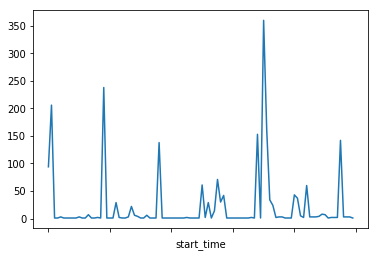

In [66]:
executioncount_over_time.plot()

In [1]:
df.index

NameError: name 'df' is not defined